In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os,sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [2]:
datasets_dir ='fidle-datasets'

In [3]:
data = pd.read_csv(f'{datasets_dir}/BHPD/origine/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


In [4]:
df=data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
X = df.drop('medv',  axis=1)
y = df['medv']

In [7]:
x_train ,x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [8]:
print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


In [9]:
std_scaler=StandardScaler()
x_train_std=std_scaler.fit_transform(x_train)
x_test_std=std_scaler.transform(x_test)

In [10]:
x_train_std_df=pd.DataFrame(x_train_std,columns=x_train.columns)
x_test_std_df=pd.DataFrame(x_test_std,columns=x_train.columns)

In [11]:
x_train_std_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,2.979412e-18,1.103951e-16,-4.014366e-17,2.603065e-17,-1.644949e-16,-5.576205e-16,7.370125e-17,6.272446e-19,5.958824e-18,-1.505387e-16,4.713744e-16,-9.737973e-17,-3.776013e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-4.018459e-01,-4.999792e-01,-1.520455e+00,-2.636027e-01,-1.482176e+00,-3.919205e+00,-2.360604e+00,-1.253553e+00,-9.645908e-01,-1.260821e+00,-2.643715e+00,-4.213769e+00,-1.515269e+00
25%,-3.938011e-01,-4.999792e-01,-8.775506e-01,-2.636027e-01,-9.190995e-01,-5.893965e-01,-8.507175e-01,-8.014615e-01,-6.181601e-01,-7.383712e-01,-4.831722e-01,1.807736e-01,-8.071961e-01
50%,-3.711149e-01,-4.999792e-01,-3.606501e-01,-2.636027e-01,-1.567805e-01,-1.325598e-01,3.734422e-01,-2.648077e-01,-5.026833e-01,-5.329134e-01,2.820200e-01,3.626138e-01,-1.811775e-01
75%,-3.052051e-02,3.467743e-01,1.005342e+00,-2.636027e-01,6.336923e-01,4.833317e-01,8.841784e-01,6.377762e-01,1.691377e+00,1.551016e+00,7.771443e-01,4.103910e-01,6.050594e-01
max,1.026419e+01,3.733788e+00,2.385652e+00,3.793587e+00,2.727904e+00,3.525700e+00,1.107402e+00,4.050895e+00,1.691377e+00,1.815176e+00,1.587348e+00,4.245429e-01,3.471659e+00


In [12]:
display(x_train_std_df.describe().style.format("{0:.2f}").set_caption("After normalization (x_train) :"))
display(x_test_std_df.describe().style.format("{0:.2f}").set_caption("After normalization (x_test) :"))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.50,-1.52,-0.26,-1.48,-3.92,-2.36,-1.25,-0.96,-1.26,-2.64,-4.21,-1.52
25%,-0.39,-0.50,-0.88,-0.26,-0.92,-0.59,-0.85,-0.80,-0.62,-0.74,-0.48,0.18,-0.81
50%,-0.37,-0.50,-0.36,-0.26,-0.16,-0.13,0.37,-0.26,-0.50,-0.53,0.28,0.36,-0.18
75%,-0.03,0.35,1.01,-0.26,0.63,0.48,0.88,0.64,1.69,1.55,0.78,0.41,0.61
max,10.26,3.73,2.39,3.79,2.73,3.53,1.11,4.05,1.69,1.82,1.59,0.42,3.47


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,0.10,-0.06,0.03,0.06,-0.04,-0.11,-0.05,0.05,0.08,0.13,-0.03,-0.15,0.10
std,1.10,0.96,0.94,1.10,1.01,1.00,1.02,1.06,1.02,0.96,0.91,1.21,1.03
min,-0.40,-0.50,-1.48,-0.26,-1.42,-3.49,-2.25,-1.28,-0.96,-1.25,-2.64,-4.19,-1.49
25%,-0.39,-0.50,-0.75,-0.26,-0.94,-0.61,-0.88,-0.84,-0.62,-0.58,-0.67,0.12,-0.66
50%,-0.38,-0.50,-0.17,-0.26,-0.28,-0.22,0.20,-0.30,-0.50,-0.10,0.10,0.35,-0.06
75%,0.19,-0.50,1.01,-0.26,0.52,0.29,0.95,0.84,1.69,1.55,0.78,0.42,0.68
max,8.41,3.52,2.39,3.79,2.73,3.45,1.11,3.36,1.69,1.82,1.23,0.42,3.61


In [13]:
y_train =  np.array(y_train)
y_test = np.array(y_test)

In [14]:
  def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

In [15]:
model=get_model_v1( (13,) )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 32)                448       
                                                                 
 Dense_n2 (Dense)            (None, 64)                2112      
                                                                 
 Dense_n3 (Dense)            (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train_std,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test_std, y_test))

Epoch 1/60
36/36 [==============================] - 1s 6ms/step - loss: 533.1469 - mae: 21.2777 - mse: 533.1469 - val_loss: 409.9021 - val_mae: 18.2888 - val_mse: 409.9021
Epoch 2/60
36/36 [==============================] - 0s 2ms/step - loss: 246.1669 - mae: 13.3550 - mse: 246.1669 - val_loss: 92.7569 - val_mae: 7.1893 - val_mse: 92.7569
Epoch 3/60
36/36 [==============================] - 0s 2ms/step - loss: 56.2587 - mae: 5.5909 - mse: 56.2587 - val_loss: 51.1919 - val_mae: 5.2956 - val_mse: 51.1919
Epoch 4/60
36/36 [==============================] - 0s 2ms/step - loss: 28.5560 - mae: 3.9479 - mse: 28.5560 - val_loss: 37.8484 - val_mae: 4.5406 - val_mse: 37.8484
Epoch 5/60
36/36 [==============================] - 0s 2ms/step - loss: 20.0512 - mae: 3.2461 - mse: 20.0512 - val_loss: 30.7098 - val_mae: 4.0838 - val_mse: 30.7098
Epoch 6/60
36/36 [==============================] - 0s 2ms/step - loss: 16.5428 - mae: 2.9263 - mse: 16.5428 - val_loss: 28.4080 - val_mae: 3.8851 - val_mse: 28.

36/36 [==============================] - 0s 2ms/step - loss: 4.9339 - mae: 1.6828 - mse: 4.9339 - val_loss: 14.1941 - val_mae: 2.7243 - val_mse: 14.1941
Epoch 51/60
36/36 [==============================] - 0s 2ms/step - loss: 4.7846 - mae: 1.6303 - mse: 4.7846 - val_loss: 13.9820 - val_mae: 2.7125 - val_mse: 13.9820
Epoch 52/60
36/36 [==============================] - 0s 2ms/step - loss: 4.7412 - mae: 1.6398 - mse: 4.7412 - val_loss: 13.8505 - val_mae: 2.6945 - val_mse: 13.8505
Epoch 53/60
36/36 [==============================] - 0s 2ms/step - loss: 4.6542 - mae: 1.6213 - mse: 4.6542 - val_loss: 13.5746 - val_mae: 2.6876 - val_mse: 13.5746
Epoch 54/60
36/36 [==============================] - 0s 2ms/step - loss: 4.7301 - mae: 1.6554 - mse: 4.7301 - val_loss: 13.9140 - val_mae: 2.7074 - val_mse: 13.9140
Epoch 55/60
36/36 [==============================] - 0s 2ms/step - loss: 4.5319 - mae: 1.5946 - mse: 4.5319 - val_loss: 14.0424 - val_mae: 2.7230 - val_mse: 14.0424
Epoch 56/60
36/36 [===

In [17]:
score = model.evaluate(x_test_std, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

x_test / loss      : 13.3836
x_test / mae       : 2.7119
x_test / mse       : 13.3836


In [18]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,533.146851,21.277733,533.146851,409.902100,18.288813,409.902100
1,246.166870,13.354990,246.166870,92.756927,7.189256,92.756927
2,56.258652,5.590917,56.258652,51.191856,5.295635,51.191856
3,28.555962,3.947882,28.555962,37.848354,4.540606,37.848354
4,20.051222,3.246128,20.051222,30.709843,4.083769,30.709843
5,16.542772,2.926275,16.542772,28.408020,3.885135,28.408020
6,15.181609,2.756419,15.181609,26.188175,3.708940,26.188177
7,13.990055,2.641524,13.990055,24.328522,3.597265,24.328522
8,12.794390,2.561557,12.794390,25.008921,3.550760,25.008921
9,12.201954,2.511927,12.201953,23.290125,3.439662,23.290125


In [19]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.6825


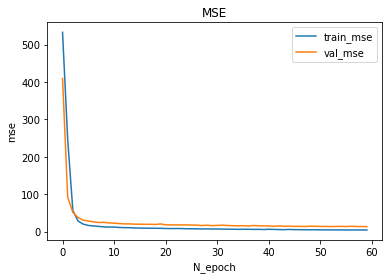

In [21]:
plt.figure()
plt.plot(df['mse'],label='train_mse')
plt.plot(df['val_mse'],label='val_mse')
plt.title("MSE")
plt.xlabel('N_epoch')
plt.ylabel('mse')
plt.legend()
plt.legend()
